In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load
from metric_helpers import bin_data, binned_logistic_accuracy, apply_to_all

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
dataset = "adult"
sensitives = ["race", "sex"]
split_ids = [0, 1, 2]
algo_names = ["UGP_in_True", "UGP_in_False"]
adult, results_adult = load(dataset, sensitives, split_ids, algo_names)

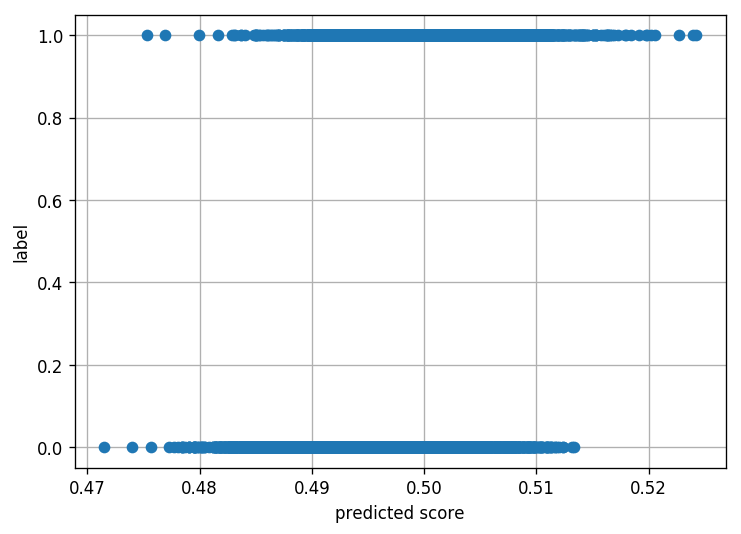

In [3]:
fig, plot = plt.subplots(figsize=(7, 5), dpi=120)
plot.plot(results_adult['UGP_in_True']['race'][0]['pred_mean'], adult['race'][0]['ytest'], 'o')
plot.set_ylabel('label')
plot.set_xlabel('predicted score')
plot.grid()

In [4]:
def confidence_and_accuracy(result, dataset):
    scores = result['pred_mean']
    labels = dataset['ytest']
    num_bins = 15
    indices, confidence = bin_data(scores, num_bins)
    accuracy = binned_logistic_accuracy(labels, indices, num_bins)
    return confidence, accuracy

conf_acc = apply_to_all(confidence_and_accuracy, results_adult, adult)

In [12]:
confidence, accuracy = conf_acc['UGP_in_True']['race'][0]
scale = max(confidence.max() - 0.5, 0.5 - confidence.min())
confidence = 0.5 * (confidence - 0.5) / scale + 0.5

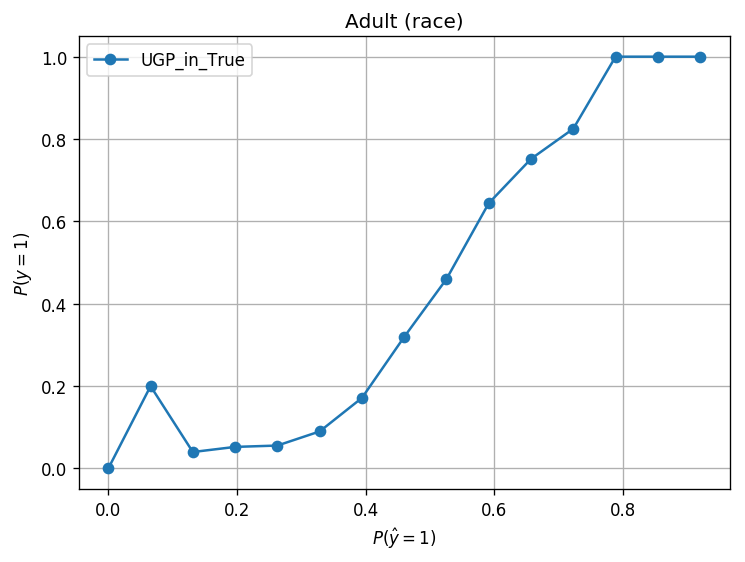

In [15]:
fig, plot = plt.subplots(figsize=(7, 5), dpi=120)
plot.plot(confidence, accuracy, 'o-', label='UGP_in_True')
#plot.plot([0.48, 0.52], [0.48, 0.52])
plot.set_title('Adult (race)')
plot.set_xlabel('$P(\\hat{y}=1)$')
plot.set_ylabel('$P(y=1)$')
plot.grid()
plot.legend()
#fig.savefig('confidence_adult.png')

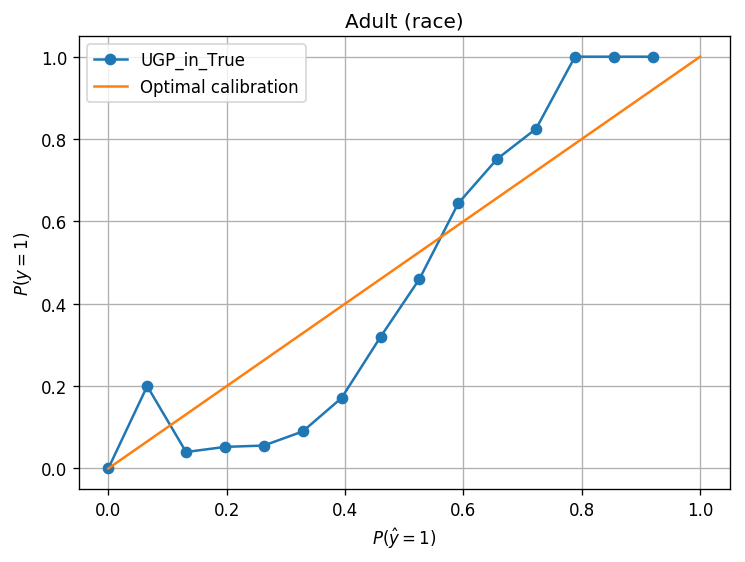

In [16]:
plot.plot([0, 1], [0, 1], label='Optimal calibration')
plot.legend()
#fig.savefig('confidence_adult_with_optimal_scaled.png')
fig

In [87]:
algo = 'UGP_in_True'
sensitive = 'race'
data = np.concatenate((results_adult[algo][sensitive][0]['pred_mean'], adult[sensitive][0]['ytest']), axis=1)
np.savetxt(f"adult_{sensitive}_0_{algo}.csv", data, fmt=['%.6f', '%i'], delimiter=',', header='prediction,label')